In [1]:
path = 'C:/Users/joaqu/Box/Emotional-State-Capstone/data/R00/fitbit/fitbit_daily_summary/'
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import re
import os
import pickle
import datetime
import pendulum

In [2]:
files = os.listdir(path = path)
print(files[0:])

['fitbit_export_R00_1002.csv', 'fitbit_export_R00_1004.xls', 'fitbit_export_R00_1008.csv', 'fitbit_export_R00_1009.csv', 'fitbit_export_R00_1014.csv', 'fitbit_export_R00_1016.csv', 'fitbit_export_R00_1018.csv', 'fitbit_export_R00_1019.csv', 'fitbit_export_R00_1020.csv', 'fitbit_export_R00_1021.csv', 'fitbit_export_R00_1024.csv', 'fitbit_export_R00_1029.csv', 'fitbit_export_R00_1030.csv', 'fitbit_export_R00_1032.csv', 'fitbit_export_R00_1034.csv', 'fitbit_export_R00_1035.csv', 'fitbit_export_R00_1037.csv', 'fitbit_export_R00_1039.csv', 'fitbit_export_R00_1041.csv', 'fitbit_export_R00_1045.csv', 'fitbit_export_R00_1047.csv', 'fitbit_export_R00_1048.csv', 'fitbit_export_R00_1049.csv', 'fitbit_export_R00_1050.csv', 'fitbit_export_R00_1051.csv', 'fitbit_export_R00_1055.csv', 'fitbit_export_R00_1060.csv', 'fitbit_export_R00_1066.csv', 'fitbit_export_R00_1067.csv', 'fitbit_export_R00_1073.csv', 'fitbit_export_R00_1079.csv', 'fitbit_export_R00_1080.csv', 'fitbit_export_R00_1081.csv', 'fitbit_e

In [15]:
activity = pd.read_csv(path + files[0], skiprows = 1, nrows=10)

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,7/16/15,"4,200","35,439",15.56,53.0,280.0,327.0,166.0,162.0,"3,305"
1,7/17/15,"3,789","28,843",12.67,48.0,347.0,273.0,168.0,127.0,"2,794"
2,7/18/15,"4,478","39,139",17.24,102.0,340.0,400.0,124.0,194.0,"3,629"
3,7/19/15,"4,715","45,343",19.94,116.0,327.0,391.0,121.0,248.0,"3,920"
4,7/20/15,"3,948","31,182",13.72,61.0,407.0,335.0,114.0,157.0,"3,001"
5,7/21/15,"3,773","35,138",15.53,141.0,445.0,201.0,60.0,233.0,"2,705"
6,7/22/15,"3,798","31,882",14.02,61.0,391.0,349.0,99.0,146.0,"2,842"
7,7/23/15,"4,023","35,056",15.41,79.0,344.0,320.0,119.0,176.0,"3,093"
8,7/24/15,"3,862","31,462",13.87,67.0,434.0,273.0,126.0,167.0,"2,876"
9,7/25/15,"4,684","45,983",20.37,119.0,381.0,445.0,101.0,226.0,"3,901"


In [191]:
sleep = pd.read_csv(path + files[0], skiprows = 14)
sleep = sleep.drop(columns = [i for i in sleep.columns if i[:7] == 'Unnamed']).copy()
sleep.head()

,Date,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed
0,7/16/15,477,20,16,505
1,7/17/15,404,45,17,462
2,7/18/15,361,17,13,382
3,7/19/15,281,9,4,291
4,7/20/15,409,18,15,427


In [192]:
with open('All_clean_data/EXPERIENCING_SAMPLE_R00_DND.pickle' ,'rb') as handle:
    exp = pickle.load(handle)
subj = exp.query('subject == "1002"')

In [193]:
subj.head()

,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_survey,survey_no,experiment,DATE
702,1002,4.0,3.0,1.0,2.0,4.0,4.0,1.0,1.0,2015-07-15 14:27:14,1,R00,0715
703,1002,5.0,5.0,1.0,3.0,2.0,5.0,1.0,1.0,2015-07-16 00:24:25,2,R00,0716
704,1002,5.0,5.0,1.0,2.0,5.0,5.0,1.0,1.0,2015-07-16 10:37:28,3,R00,0716
705,1002,5.0,5.0,1.0,1.0,5.0,5.0,1.0,1.0,2015-07-16 15:33:23,4,R00,0716
706,1002,4.0,5.0,1.0,2.0,4.0,5.0,1.0,1.0,2015-07-16 21:45:35,5,R00,0716


In [194]:
subj.loc[:,'start_survey'] = pd.to_datetime(subj.loc[:,'start_survey']).copy() #convert to datetime

C:\Users\joaqu\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [195]:
gb = subj.groupby('DATE')

In [196]:
dates = [i[1]['start_survey'] for i in gb ]

In [197]:
date_filter = []
for date in dates:
    if sorted(date)[0].hour > 4:
        date_filter.append (sorted(date)[0])
    else:
        date_filter.append (sorted(date)[1])

In [198]:
early_survey = subj.loc[subj.start_survey.isin(date_filter),:]
early_survey

,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_survey,survey_no,experiment,DATE
702,1002,4.0,3.0,1.0,2.0,4.0,4.0,1.0,1.0,2015-07-15 14:27:14,1,R00,0715
704,1002,5.0,5.0,1.0,2.0,5.0,5.0,1.0,1.0,2015-07-16 10:37:28,3,R00,0716
707,1002,3.0,3.0,1.0,3.0,2.0,4.0,1.0,1.0,2015-07-17 10:02:31,6,R00,0717
710,1002,3.0,5.0,1.0,1.0,2.0,5.0,1.0,1.0,2015-07-18 11:22:00,9,R00,0718
713,1002,3.0,4.0,1.0,2.0,2.0,5.0,1.0,1.0,2015-07-19 11:34:12,12,R00,0719
716,1002,4.0,3.0,1.0,5.0,4.0,5.0,1.0,1.0,2015-07-20 10:39:39,15,R00,0720
719,1002,4.0,5.0,1.0,2.0,3.0,5.0,1.0,1.0,2015-07-21 11:12:54,18,R00,0721
722,1002,3.0,3.0,1.0,3.0,3.0,5.0,1.0,1.0,2015-07-22 10:57:43,21,R00,0722
725,1002,4.0,5.0,1.0,1.0,3.0,5.0,1.0,1.0,2015-07-23 11:29:33,24,R00,0723
728,1002,2.0,4.0,1.0,2.0,2.0,4.0,1.0,1.0,2015-07-24 11:15:00,27,R00,0724


In [199]:
to_DATE = [ '0'+i[0]+ str(int(i[2:4])+1) for i in sleep['Date']  ]
sleep['DATE'] = to_DATE
sleep.head()

,Date,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,DATE
0,7/16/15,477,20,16,505,0717
1,7/17/15,404,45,17,462,0718
2,7/18/15,361,17,13,382,0719
3,7/19/15,281,9,4,291,0720
4,7/20/15,409,18,15,427,0721


In [200]:
emotion_after_sleep = pd.merge(sleep, early_survey, how='inner', on = 'DATE')
emotion_after_sleep.head()

,Date,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,DATE,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_survey,survey_no,experiment
0,7/16/15,477,20,16,505,0717,1002,3.0,3.0,1.0,3.0,2.0,4.0,1.0,1.0,2015-07-17 10:02:31,6,R00
1,7/17/15,404,45,17,462,0718,1002,3.0,5.0,1.0,1.0,2.0,5.0,1.0,1.0,2015-07-18 11:22:00,9,R00
2,7/18/15,361,17,13,382,0719,1002,3.0,4.0,1.0,2.0,2.0,5.0,1.0,1.0,2015-07-19 11:34:12,12,R00
3,7/19/15,281,9,4,291,0720,1002,4.0,3.0,1.0,5.0,4.0,5.0,1.0,1.0,2015-07-20 10:39:39,15,R00
4,7/20/15,409,18,15,427,0721,1002,4.0,5.0,1.0,2.0,3.0,5.0,1.0,1.0,2015-07-21 11:12:54,18,R00


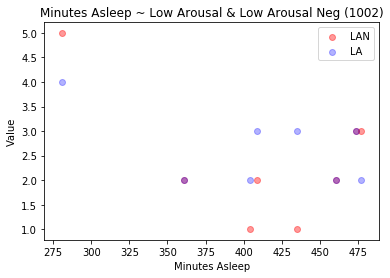

In [220]:
plt.scatter(emotion_after_sleep['Minutes Asleep'],emotion_after_sleep['la_n'], color ='red', alpha = 0.4, label = 'LAN')
plt.scatter(emotion_after_sleep['Minutes Asleep'],emotion_after_sleep['la'], color ='blue', alpha = 0.3, label = 'LA')
plt.title('Minutes Asleep ~ Low Arousal & Low Arousal Neg (1002)')
plt.xlabel('Minutes Asleep')
plt.ylabel('Value')
plt.legend()

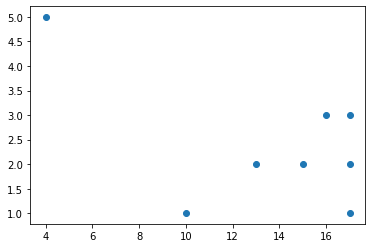

In [202]:
plt.scatter(emotion_after_sleep['Number of Awakenings'],emotion_after_sleep['la_n'])

# Playing with other subject

In [222]:
sleep = pd.read_csv(path + files[15], skiprows = 14)
sleep = sleep.drop(columns = [i for i in sleep.columns if i[:7] == 'Unnamed']).copy()
sleep

,Date,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed
0,12/18/15,135,11,6,147
1,12/19/15,532,25,13,557
2,12/20/15,348,28,12,376
3,12/21/15,229,37,17,266
4,12/22/15,468,48,22,516
5,12/23/15,313,34,20,348
6,12/24/15,316,31,14,347
7,12/25/15,495,24,10,519
8,12/26/15,493,21,12,514
9,12/27/15,433,13,9,446


In [223]:
subj = exp.query('subject == "1035"')
subj.loc[:,'start_survey'] = pd.to_datetime(subj.loc[:,'start_survey']).copy() #convert to datetime
gb = subj.groupby('DATE')
dates = [i[1]['start_survey'] for i in gb ]
date_filter = []
for date in dates:
    if sorted(date)[0].hour > 4:
        date_filter.append (sorted(date)[0])
    else:
        try:
            date_filter.append(sorted(date)[1])
        except IndexError:
            date_filter.append(None)

C:\Users\joaqu\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [224]:
date_filter

[Timestamp('2015-12-18 11:58:00'),
 Timestamp('2015-12-19 13:28:00'),
 Timestamp('2015-12-20 17:22:00'),
 Timestamp('2015-12-21 09:21:00'),
 Timestamp('2015-12-22 13:13:00'),
 Timestamp('2015-12-23 18:41:00'),
 Timestamp('2015-12-24 15:49:00'),
 Timestamp('2015-12-25 12:33:00'),
 Timestamp('2015-12-26 20:40:00'),
 Timestamp('2015-12-27 14:01:00'),
 None]

In [225]:
early_survey = subj.loc[subj.start_survey.isin(date_filter),:]
to_DATE = [ i[0:2]+ str(int(i[3:5])+1) for i in sleep['Date']  ]
sleep['DATE'] = to_DATE
sleep.head()

,Date,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,DATE
0,12/18/15,135,11,6,147,1219
1,12/19/15,532,25,13,557,1220
2,12/20/15,348,28,12,376,1221
3,12/21/15,229,37,17,266,1222
4,12/22/15,468,48,22,516,1223


In [226]:
early_survey

,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_survey,survey_no,experiment,DATE
498,1035,3.0,4.0,1.0,1.0,1.0,4.0,1.0,3.0,2015-12-18 11:58:00,1,R00,1218
501,1035,2.0,3.0,1.0,1.0,3.0,3.0,1.0,2.0,2015-12-19 13:28:00,4,R00,1219
504,1035,3.0,3.0,1.0,1.0,3.0,3.0,1.0,2.0,2015-12-20 17:22:00,7,R00,1220
506,1035,3.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,2015-12-21 09:21:00,9,R00,1221
509,1035,3.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,2015-12-22 13:13:00,12,R00,1222
512,1035,3.0,2.0,1.0,2.0,3.0,3.0,1.0,2.0,2015-12-23 18:41:00,15,R00,1223
514,1035,1.0,3.0,3.0,1.0,1.0,3.0,1.0,4.0,2015-12-24 15:49:00,17,R00,1224
517,1035,3.0,4.0,1.0,1.0,1.0,4.0,1.0,4.0,2015-12-25 12:33:00,20,R00,1225
520,1035,3.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,2015-12-26 20:40:00,23,R00,1226
523,1035,3.0,3.0,1.0,1.0,2.0,4.0,1.0,3.0,2015-12-27 14:01:00,26,R00,1227


In [227]:
emotion_after_sleep = pd.merge(sleep, early_survey, how='inner', on = 'DATE')
emotion_after_sleep.head()

,Date,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,DATE,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_survey,survey_no,experiment
0,12/18/15,135,11,6,147,1219,1035,2.0,3.0,1.0,1.0,3.0,3.0,1.0,2.0,2015-12-19 13:28:00,4,R00
1,12/19/15,532,25,13,557,1220,1035,3.0,3.0,1.0,1.0,3.0,3.0,1.0,2.0,2015-12-20 17:22:00,7,R00
2,12/20/15,348,28,12,376,1221,1035,3.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,2015-12-21 09:21:00,9,R00
3,12/21/15,229,37,17,266,1222,1035,3.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,2015-12-22 13:13:00,12,R00
4,12/22/15,468,48,22,516,1223,1035,3.0,2.0,1.0,2.0,3.0,3.0,1.0,2.0,2015-12-23 18:41:00,15,R00


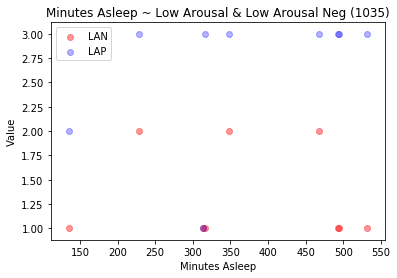

In [230]:
plt.scatter(emotion_after_sleep['Minutes Asleep'],emotion_after_sleep['la_n'], color ='red', alpha = 0.4, label = 'LAN')
plt.scatter(emotion_after_sleep['Minutes Asleep'],emotion_after_sleep['la_p'], color ='blue', alpha = 0.3, label = 'LAP')
plt.title('Minutes Asleep ~ Low Arousal & Low Arousal Neg (1035)')
plt.xlabel('Minutes Asleep')
plt.ylabel('Value')
plt.legend()

---

In [232]:
'a'

'a'